In [1]:
import pandas as pd
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

In [2]:
gdf = gpd.read_parquet('/app/assets/bikeway/utopic.parquet')

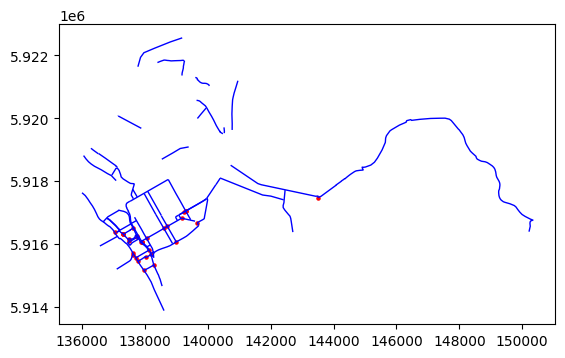

In [3]:
# Lista para guardar los puntos de intersección
intersections = []

# Encontrar intersecciones
for i, geom1 in enumerate(gdf.geometry):
    for j, geom2 in enumerate(gdf.geometry):
        if i < j and geom1.intersects(geom2):
            intersection = geom1.intersection(geom2)
            if isinstance(intersection, Point):
                intersections.append(intersection)

# Convertir la lista de intersecciones en un GeoDataFrame
intersections_gdf = gpd.GeoDataFrame(geometry=intersections)

# Crear una figura y un eje
fig, ax = plt.subplots()

# Plotear las líneas originales
gdf.plot(ax=ax, linewidth=1, color='blue')

# Plotear los puntos de intersección
intersections_gdf.plot(ax=ax, marker='o', color='red', markersize=5)

# Mostrar el plot
plt.show()

0     POLYGON ((-931752268.321 365326704.575, -93287...
1     POLYGON ((-998902202.749 7223205.736, -9994638...
2     POLYGON ((-797335982.748 -597433819.149, -8456...
3     POLYGON ((-999103890.932 -15193119.167, -99982...
4     POLYGON ((-568874847.600 -815760955.573, -5793...
                            ...                        
63    MULTIPOLYGON (((-533616695.467 850200543.590, ...
64    POLYGON ((-879962810.624 -468455389.438, -8821...
65    POLYGON ((-853568048.056 -513521297.091, -8935...
66    POLYGON ((638967257.223 -763431961.921, 560481...
67    POLYGON ((776413490.665 636309290.781, 8344648...
Length: 68, dtype: geometry

/tmp/ipykernel_229/1559901704.py:32: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  intersections_gdf.plot(ax=ax, marker='o', color='red', markersize=5)


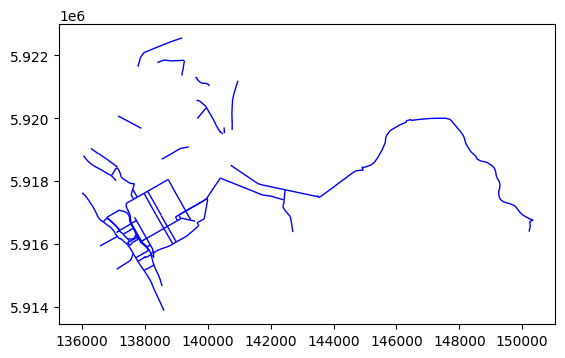

In [10]:
# Crear buffers alrededor de cada línea
buffer_dist = 1e9 # Ajusta esto según la escala de tus datos
gdf_buffered = gdf.buffer(buffer_dist)

display(gdf_buffered)

# Lista para guardar los puntos de intersección
intersections = []

# Encontrar intersecciones entre los buffers
for i, geom1 in enumerate(gdf_buffered):
    for j, geom2 in enumerate(gdf_buffered):
        if i < j and geom1.intersects(geom2):
            intersection = geom1.intersection(geom2)
            if isinstance(intersection, Point):
                intersections.append(intersection)
            elif isinstance(intersection, LineString):
                # En caso de intersecciones más complejas, extrae los puntos
                for pt in intersection.coords:
                    intersections.append(Point(pt))

# Convertir la lista de intersecciones en un GeoDataFrame
intersections_gdf = gpd.GeoDataFrame(geometry=intersections)

# Crear una figura y un eje
fig, ax = plt.subplots()

# Plotear las líneas originales
gdf.plot(ax=ax, linewidth=1, color='blue')

# Plotear los puntos de intersección
intersections_gdf.plot(ax=ax, marker='o', color='red', markersize=5)

# Mostrar el plot
plt.show()
